# 🚢 Digit Recognizer - Neural Network Learning Journey

**Learning neural networks through the classic MNIST handwritten digit recognition challenge**

---

## 🎯 Learning Objectives

By the end of this notebook, you will:
- Understand how neural networks work from the ground up
- Implement a neural network from scratch using PyTorch
- Learn about forward propagation, backpropagation, and gradient descent
- Train your first deep learning model
- Evaluate model performance and make predictions

---

## 📋 Project Structure

This notebook is organized into learning phases:
1. **Environment Setup** - Import libraries and check setup
2. **Data Exploration** - Load and understand the MNIST dataset
3. **Neural Network Basics** - Learn the theory and implement from scratch
4. **Training Pipeline** - Build the training loop and optimization
5. **Model Evaluation** - Test performance and analyze results
6. **Kaggle Submission** - Generate predictions for competition

---


## Phase 1: Environment Setup 🔧

Let's start by importing all the necessary libraries and checking our environment.


In [104]:
# TODO: Import the following libraries
# - pandas (for data manipulation)
# - numpy (for numerical operations)
# - matplotlib.pyplot (for plotting)
# - seaborn (for statistical visualizations)
# - torch (PyTorch for neural networks)
# - torch.nn (neural network modules)
# - torch.optim (optimizers)
# - torch.nn.functional (activation functions)
# - sklearn.model_selection (for train/test split)
# - sklearn.metrics (for evaluation metrics)


# HINT: Use import statements like:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# etc.

# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn import metrics
from torch.utils.data import TensorDataset, DataLoader

In [105]:
# TODO: Check your PyTorch version and device availability
# Print the PyTorch version
# Check if CUDA is available (for GPU training)
# Set the device to use (CPU or GPU)

# HINT: Use torch.__version__ and torch.cuda.is_available()
# Set device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# YOUR CODE HERE
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## Phase 2: Data Exploration 📊

Now let's load and explore the MNIST dataset. The MNIST dataset contains 70,000 images of handwritten digits (0-9), each 28x28 pixels.


In [106]:
# TODO: Load the training data
# Read the train.csv file from the data/ directory
# Display basic information about the dataset
# Show the first few rows

# HINT: Use pd.read_csv('data/train.csv')
# Use .info(), .head(), .shape to explore the data

# YOUR CODE HERE
df = pd.read_csv("../data/train.csv")
print(df.head())
print("Shape of the dataset:", df.shape)
print()
print("Information about the dataset:", df.info())
print("Description about the dataset:", df.describe())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [107]:
# TODO: Separate features and labels
# The first column is 'label' (the digit 0-9)
# The remaining 784 columns are pixel values (28x28 = 784)
# Create X (features) and y (labels) variables

# HINT: Use .iloc[:, 1:] for features and .iloc[:, 0] for labels
# Convert to numpy arrays using .values

# YOUR CODE HERE
y = df["label"]
print("Head of labels, firt 5 rows:", y.head(5))
print()
print("Now creating the X (features)...")
print()
X = df.drop(["label"], axis=1)
print("First five rows of:")
print(X.head(5))
print()
print("Shape of X is:", X.shape)
print("Shape of y is:", y.shape)

# Convert to NumPy arrays
X = X.values  # or X.to_numpy()
y = y.values  # or y.to_numpy()

print()
print("After converting to NumPy:")
print("Type of X:", type(X))
print("Type of y:", type(y))



Head of labels, firt 5 rows: 0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

Now creating the X (features)...

First five rows of:
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4 

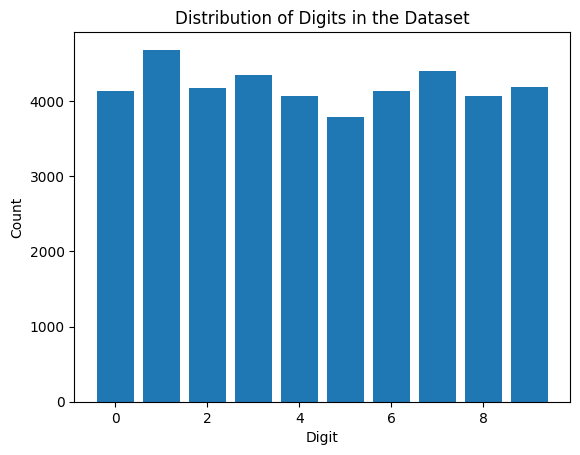

In [108]:
# TODO: Explore the data distribution
# Count how many samples we have for each digit (0-9)
# Create a bar plot showing the distribution
# Check if the dataset is balanced

# HINT: Use pd.Series(y).value_counts().sort_index()
# Use plt.bar() or sns.countplot() for visualization

# YOUR CODE HERE
counts = pd.Series(y).value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Distribution of Digits in the Dataset")
plt.show()

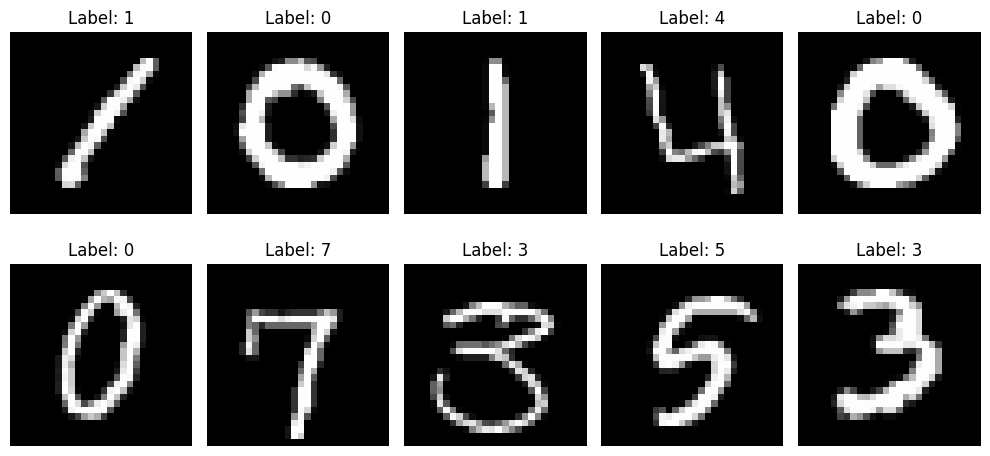

In [109]:
# Visualize the first 10 sample images in a 2x5 grid

# The images come from the MNIST dataset, which is loaded into the DataFrame 'df'.
# After dropping the 'label' column, the remaining columns in 'X' represent the pixel values (flattened 28x28 images).
# Each row in 'X' is a single image, with 784 pixel values (0-255).
# Here, we reshape each row back to 28x28 to display the original handwritten digit.

plt.figure(figsize=(10, 5))
for i in range(10):
    img = X[i].reshape(28, 28)  # Reshape the flattened image back to 28x28 pixels
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [110]:
# Pick one image
sample_image = X[0]
print("Flat array (first 28 pixels):", sample_image[:28])
print()

# Reshape it
reshaped = sample_image.reshape(28, 28)
print("Reshaped (first row of the image):")
print(reshaped[0])  # First row of pixels
print()
print("Middle row (where digit likely is):")
print(reshaped[14])  # Middle row - usually has the digit

Flat array (first 28 pixels): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Reshaped (first row of the image):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Middle row (where digit likely is):
[  0   0   0   0   0   0   0   0   0   0   0  20 206 254 254 198   7   0
   0   0   0   0   0   0   0   0   0   0]


## Phase 3: Data Preprocessing 🔄

Before training our neural network, we need to prepare the data properly.


In [111]:
# TODO: Normalize the pixel values
# Pixel values are currently 0-255, we need to scale them to 0-1
# This helps the neural network train more effectively

# HINT: Divide X by 255.0 to normalize
# Check the min and max values after normalization
print("Just to track normalization worked, lets print X max before:", X.max())
# YOUR CODE HERE
X = X / 255.0
print("After normalization:")
print(X.max())
print(X.min())
print(X.mean())

Just to track normalization worked, lets print X max before: 255
After normalization:
1.0
0.0
0.13101533792088282


In [112]:
# TODO: Split the data into training and validation sets
# Use 80% for training and 20% for validation
# Use random_state=42 for reproducibility

# HINT: Use train_test_split from sklearn.model_selection
# X_train, X_val, y_train, y_val = train_test_split(...)
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Correct usage: train_test_split returns train and test splits in the order (X_train, X_val, y_train, y_val)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of the training data:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("Shape of the validation data:")
print("X_val:", X_test.shape)
print("y_val:", y_test.shape)



Shape of the training data:
X_train: (33600, 784)
y_train: (33600,)
Shape of the validation data:
X_val: (8400, 784)
y_val: (8400,)


In [113]:
# TODO: Convert to PyTorch tensors
# Convert numpy arrays to PyTorch tensors
# Convert data type to float32 for features
# Convert labels to long type (int64)

# HINT: Use torch.from_numpy() and .float() or .long()
# Move tensors to the device (CPU or GPU)

# YOUR CODE HERE
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

print("Tensor types and shape for X_tensor_train:")
print("Shape:", X_train_tensor.shape)
print("Types:", X_train_tensor.dtype)

Tensor types and shape for X_tensor_train:
Shape: torch.Size([33600, 784])
Types: torch.float32


## Phase 4: Neural Network Theory 🧠

Before we implement our neural network, let's understand the key concepts:

### What is a Neural Network?
A neural network is inspired by how the human brain works. It consists of:
- **Input Layer**: Receives the data (784 pixels for MNIST)
- **Hidden Layers**: Process the information (we'll use 2 hidden layers)
- **Output Layer**: Produces the final prediction (10 classes for digits 0-9)

### Key Components:
1. **Weights and Biases**: Parameters that the network learns
2. **Activation Functions**: Add non-linearity (ReLU, Softmax)
3. **Forward Propagation**: Data flows from input to output
4. **Loss Function**: Measures how wrong our predictions are
5. **Backpropagation**: Updates weights based on the error
6. **Optimizer**: Decides how to update the weights (Adam, SGD)

### Our Architecture:
- Input: 784 features (28×28 pixels)
- Hidden Layer 1: 128 neurons with ReLU activation
- Hidden Layer 2: 64 neurons with ReLU activation
- Output Layer: 10 neurons (one for each digit) with Softmax activation


## Phase 5: Neural Network Implementation 🏗️

Now let's build our neural network step by step.


In [114]:
# TODO: Define the neural network architecture
# Create a class that inherits from torch.nn.Module
# Define the layers in __init__ method:
#   - Linear layer: 784 -> 128 (input to first hidden)
#   - Linear layer: 128 -> 64 (first hidden to second hidden)
#   - Linear layer: 64 -> 10 (second hidden to output)
# Define forward method with ReLU activations between layers
# Use softmax on the final output

# HINT: Use torch.nn.Linear() for layers
# Use torch.nn.functional.relu() and torch.nn.functional.softmax()
# Don't forget to call super().__init__()


class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        # YOUR CODE HERE
        self.fc1 = torch.nn.Linear(784, 128)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)
        
    def forward(self, x):
        # YOUR CODE HERE
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x


In [115]:
# TODO: Initialize the model
# Create an instance of your DigitClassifier
# Move the model to the device (CPU or GPU)
# Print the model architecture

# HINT: model = DigitClassifier().to(device)
# Use print(model) to see the architecture

# YOUR CODE HERE
model = DigitClassifier().to(device)
print(model)

DigitClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [116]:
# TODO: Define loss function and optimizer
# Use CrossEntropyLoss (combines softmax and negative log-likelihood)
# Use Adam optimizer with learning rate 0.001

# HINT: criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# YOUR CODE HERE
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Phase 6: Training Pipeline 🚂

Now comes the exciting part - training our neural network!


In [117]:
# TODO: Create data loaders for batching
# Create TensorDataset from your training and validation tensors
# Create DataLoader with batch_size=64 for training
# Create DataLoader with batch_size=64 for validation
# Set shuffle=True for training data

# HINT: Use torch.utils.data.TensorDataset and DataLoader
# train_dataset = TensorDataset(X_train, y_train)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# YOUR CODE HERE
from torch.utils.data import TensorDataset


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# Create validation/test dataset and loader
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)  # ← Add this
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # ← Add this

In [119]:
# TODO: Implement the training loop
# Set number of epochs (start with 10)
# Create lists to track training and validation losses
# Create lists to track training and validation accuracies

# For each epoch:
#   1. Set model to training mode
#   2. Initialize running loss and correct predictions
#   3. For each batch in training data:
#      - Zero the gradients
#      - Forward pass
#      - Calculate loss
#      - Backward pass (backpropagation)
#      - Update weights
#      - Track loss and accuracy
#   4. Calculate average training loss and accuracy
#   5. Evaluate on validation set (similar process but no gradient updates)
#   6. Print progress every epoch

# HINT: Use model.train() and model.eval()
# Use torch.no_grad() for validation
# Use optimizer.zero_grad(), loss.backward(), optimizer.step()

num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    # YOUR CODE HERE
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        batch_loss = loss(outputs, batch_y)
        batch_loss.backward()
        optimizer.step()
        running_loss += batch_loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()
    # Calculate average training loss and accuracy for this epoch
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # ==================== VALIDATION PHASE ====================
    model.eval()  # Set model to evaluation mode
    
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():  # No gradient calculation for validation
        for batch_X, batch_y in test_loader:
            # Forward pass only
            outputs = model(batch_X)
            
            # Calculate loss
            batch_loss = loss(outputs, batch_y)
            
            # Track statistics
            val_running_loss += batch_loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += batch_y.size(0)
            val_correct += (predicted == batch_y).sum().item()
    # Calculate average validation loss and accuracy for this epoch
    val_loss = val_running_loss / len(test_loader)
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)


    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
    print('-' * 50)

    # Additional analysis
print("\n📊 Epoch-by-Epoch Improvement:\n")
print(f"{'Epoch':<8} {'Train Loss':<12} {'Train Acc':<12} {'Val Loss':<12} {'Val Acc':<12}")
print("-" * 60)
for i in range(len(train_losses)):
    print(f"{i+1:<8} {train_losses[i]:<12.4f} {train_accuracies[i]:<12.4f} "
          f"{val_losses[i]:<12.4f} {val_accuracies[i]:<12.4f}")

print("\n🎓 Learning Progress:")
print(f"Accuracy improved by: {(train_accuracies[-1] - train_accuracies[0])*100:.2f}% (training)")
print(f"Accuracy improved by: {(val_accuracies[-1] - val_accuracies[0])*100:.2f}% (validation)")

Epoch [1/10]
Train Loss: 0.0233, Train Acc: 0.9926
Val Loss: 0.1054, Val Acc: 0.9730
--------------------------------------------------
Epoch [2/10]
Train Loss: 0.0168, Train Acc: 0.9949
Val Loss: 0.1318, Val Acc: 0.9680
--------------------------------------------------
Epoch [3/10]
Train Loss: 0.0137, Train Acc: 0.9961
Val Loss: 0.1327, Val Acc: 0.9683
--------------------------------------------------
Epoch [4/10]
Train Loss: 0.0115, Train Acc: 0.9965
Val Loss: 0.1291, Val Acc: 0.9718
--------------------------------------------------
Epoch [5/10]
Train Loss: 0.0140, Train Acc: 0.9953
Val Loss: 0.1311, Val Acc: 0.9712
--------------------------------------------------
Epoch [6/10]
Train Loss: 0.0103, Train Acc: 0.9962
Val Loss: 0.1416, Val Acc: 0.9700
--------------------------------------------------
Epoch [7/10]
Train Loss: 0.0108, Train Acc: 0.9966
Val Loss: 0.1322, Val Acc: 0.9731
--------------------------------------------------
Epoch [8/10]
Train Loss: 0.0070, Train Acc: 0.99

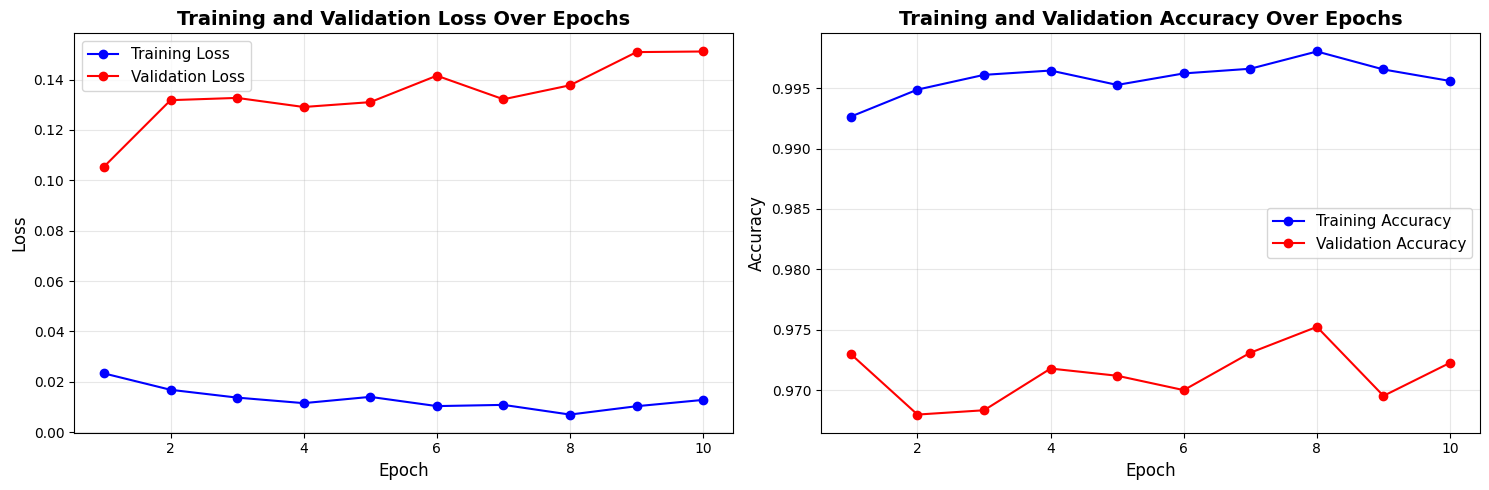


FINAL RESULTS
Final Training Loss:      0.0128
Final Training Accuracy:  0.9956 (99.56%)
Final Validation Loss:    0.1512
Final Validation Accuracy: 0.9723 (97.23%)


In [120]:
# Plot training history
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Loss over epochs
ax1.plot(range(1, num_epochs + 1), train_losses, 'b-', label='Training Loss', marker='o')
ax1.plot(range(1, num_epochs + 1), val_losses, 'r-', label='Validation Loss', marker='o')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training and Validation Loss Over Epochs', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Accuracy over epochs
ax2.plot(range(1, num_epochs + 1), train_accuracies, 'b-', label='Training Accuracy', marker='o')
ax2.plot(range(1, num_epochs + 1), val_accuracies, 'r-', label='Validation Accuracy', marker='o')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Training and Validation Accuracy Over Epochs', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final results
print("\n" + "="*60)
print("FINAL RESULTS")
print("="*60)
print(f"Final Training Loss:      {train_losses[-1]:.4f}")
print(f"Final Training Accuracy:  {train_accuracies[-1]:.4f} ({train_accuracies[-1]*100:.2f}%)")
print(f"Final Validation Loss:    {val_losses[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.4f} ({val_accuracies[-1]*100:.2f}%)")
print("="*60)

In [122]:
# ==================== PHASE 7: KAGGLE SUBMISSION ====================
# Load and preprocess test data, make predictions, create submission file

print("="*60)
print("GENERATING KAGGLE SUBMISSION")
print("="*60)

# Step 1: Load the test data
print("\n1. Loading test data...")
test_df = pd.read_csv('../data/test.csv')
print(f"   Test data shape: {test_df.shape}")
print(f"   Test samples: {len(test_df)}")

# Step 2: Preprocess test data (same as training data)
print("\n2. Preprocessing test data...")
# Convert to numpy array
X_test_kaggle = test_df.values

# Normalize (0-255 → 0-1)
X_test_kaggle = X_test_kaggle / 255.0
print(f"   Normalized to range [{X_test_kaggle.min()}, {X_test_kaggle.max()}]")

# Convert to PyTorch tensor
X_test_kaggle_tensor = torch.from_numpy(X_test_kaggle).float()
print(f"   Tensor shape: {X_test_kaggle_tensor.shape}")
print(f"   Tensor dtype: {X_test_kaggle_tensor.dtype}")

# Step 3: Make predictions
print("\n3. Making predictions...")
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    # Forward pass through the model
    outputs = model(X_test_kaggle_tensor)
    
    # Get predicted classes (0-9)
    _, predictions = torch.max(outputs, 1)
    
    # Convert to numpy for submission
    predictions = predictions.cpu().numpy()

print(f"   Predictions shape: {predictions.shape}")
print(f"   Sample predictions: {predictions[:10]}")

# Step 4: Create submission DataFrame
print("\n4. Creating submission file...")
submission = pd.DataFrame({
    'ImageId': range(1, len(predictions) + 1),  # 1-indexed
    'Label': predictions
})

print(f"   Submission shape: {submission.shape}")
print("\n   First 10 rows:")
print(submission.head(10))

# Step 5: Validate submission format
print("\n5. Validating submission format...")
assert list(submission.columns) == ['ImageId', 'Label'], "Wrong columns!"
assert submission.shape[0] == 28000, f"Wrong number of rows! Expected 28000, got {submission.shape[0]}"
assert submission['Label'].isnull().sum() == 0, "Missing values detected!"
assert submission['Label'].isin(range(10)).all(), "Invalid label values!"
print("   ✅ All validation checks passed!")

# Step 6: Save to CSV
print("\n6. Saving submission file...")
submission_path = '../data/submission.csv'
submission.to_csv(submission_path, index=False)
print(f"   ✅ Saved as '{submission_path}'")

# Step 7: Summary
print("\n" + "="*60)
print("SUBMISSION READY!")
print("="*60)
print(f"File: {submission_path}")
print(f"Samples: {len(submission)}")
print(f"Columns: {list(submission.columns)}")
print("\nLabel distribution:")
print(submission['Label'].value_counts().sort_index())
print("\n📊 Prediction Summary:")
for digit in range(10):
    count = (predictions == digit).sum()
    percentage = (count / len(predictions)) * 100
    print(f"   Digit {digit}: {count:5d} predictions ({percentage:5.2f}%)")
print(f"\n🎯 Next step: Upload '{submission_path}' to Kaggle!")
print("="*60)

GENERATING KAGGLE SUBMISSION

1. Loading test data...
   Test data shape: (28000, 784)
   Test samples: 28000

2. Preprocessing test data...
   Normalized to range [0.0, 1.0]
   Tensor shape: torch.Size([28000, 784])
   Tensor dtype: torch.float32

3. Making predictions...
   Predictions shape: (28000,)
   Sample predictions: [2 0 9 9 3 7 0 3 0 3]

4. Creating submission file...
   Submission shape: (28000, 2)

   First 10 rows:
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3

5. Validating submission format...
   ✅ All validation checks passed!

6. Saving submission file...
   ✅ Saved as '../data/submission.csv'

SUBMISSION READY!
File: ../data/submission.csv
Samples: 28000
Columns: ['ImageId', 'Label']

Label distribution:
Label
0    2768
1    3227
2    2828
3    2743
4    2669
5    2574
6    2786
7    2904
8    2714
9    2787
Name: cou

In [124]:
# ==================== SAVE TRAINED MODEL ====================
# Save model, architecture, and training metadata

import os
import json
from datetime import datetime

print("="*60)
print("SAVING TRAINED MODEL")
print("="*60)

# Create trained_models directory
model_dir = 'trained_models'
os.makedirs(model_dir, exist_ok=True)
print(f"\n✅ Created directory: {model_dir}/")

# 1. Save model weights (state_dict)
model_path = os.path.join(model_dir, 'digit_classifier_model.pth')
torch.save(model.state_dict(), model_path)
print(f"✅ Saved model weights: {model_path}")

# 2. Save complete model (architecture + weights)
full_model_path = os.path.join(model_dir, 'digit_classifier_full.pth')
torch.save(model, full_model_path)
print(f"✅ Saved complete model: {full_model_path}")

# 3. Save training metadata
metadata = {
    'model_name': 'DigitClassifier',
    'architecture': {
        'type': 'Multi-Layer Perceptron (MLP)',
        'input_size': 784,
        'hidden_layer_1': 128,
        'hidden_layer_2': 64,
        'output_size': 10,
        'activation': 'ReLU',
        'total_parameters': sum(p.numel() for p in model.parameters())
    },
    'training_config': {
        'optimizer': 'Adam',
        'learning_rate': 0.001,
        'loss_function': 'CrossEntropyLoss',
        'batch_size': 64,
        'num_epochs': num_epochs,
        'train_samples': len(train_dataset),
        'val_samples': len(test_dataset)
    },
    'performance': {
        'final_train_accuracy': float(train_accuracies[-1]),
        'final_val_accuracy': float(val_accuracies[-1]),
        'final_train_loss': float(train_losses[-1]),
        'final_val_loss': float(val_losses[-1]),
        'best_val_accuracy': float(max(val_accuracies)),
        'best_val_epoch': int(val_accuracies.index(max(val_accuracies)) + 1)
    },
    'training_history': {
        'train_losses': [float(x) for x in train_losses],
        'val_losses': [float(x) for x in val_losses],
        'train_accuracies': [float(x) for x in train_accuracies],
        'val_accuracies': [float(x) for x in val_accuracies]
    },
    'metadata': {
        'framework': 'PyTorch',
        'pytorch_version': torch.__version__,
        'trained_on': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'dataset': 'MNIST (Kaggle Digit Recognizer)',
        'author': 'Francisco Teixeira Barbosa'
    }
}

# Save metadata as JSON
metadata_path = os.path.join(model_dir, 'model_metadata.json')
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=4)
print(f"✅ Saved metadata: {metadata_path}")

# 4. Create model documentation
total_params = metadata['architecture']['total_parameters']
doc_lines = []
doc_lines.append("# Digit Classifier Model Documentation\n")
doc_lines.append("\n## 📋 Model Overview\n")
doc_lines.append(f"\n**Model Name:** DigitClassifier  ")
doc_lines.append(f"\n**Task:** Handwritten Digit Recognition (0-9)  ")
doc_lines.append(f"\n**Dataset:** MNIST (Kaggle Digit Recognizer Competition)  ")
doc_lines.append(f"\n**Framework:** PyTorch {torch.__version__}  ")
doc_lines.append(f"\n**Trained:** {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}  ")
doc_lines.append(f"\n**Author:** Francisco Teixeira Barbosa\n")
doc_lines.append("\n---\n")
doc_lines.append("\n## 🏗️ Architecture\n")
doc_lines.append("\n### Network Structure\n")
doc_lines.append("```\n")
doc_lines.append("Multi-Layer Perceptron (MLP)\n")
doc_lines.append("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\n")
doc_lines.append("Input Layer:    784 neurons (28×28 pixels)\n")
doc_lines.append("                    ↓\n")
doc_lines.append("Hidden Layer 1: 128 neurons + ReLU\n")
doc_lines.append("                    ↓\n")
doc_lines.append("Hidden Layer 2: 64 neurons + ReLU\n")
doc_lines.append("                    ↓\n")
doc_lines.append("Output Layer:   10 neurons (digits 0-9)\n")
doc_lines.append("```\n")
doc_lines.append("\n### Layer Details\n")
doc_lines.append("| Layer | Type | Input Size | Output Size | Activation | Parameters |\n")
doc_lines.append("|-------|------|------------|-------------|------------|------------|\n")
doc_lines.append("| fc1 | Linear | 784 | 128 | ReLU | 100,480 |\n")
doc_lines.append("| fc2 | Linear | 128 | 64 | ReLU | 8,256 |\n")
doc_lines.append("| fc3 | Linear | 64 | 10 | - | 650 |\n")
doc_lines.append(f"| **Total** | - | - | - | - | **{total_params:,}** |\n")
doc_lines.append("\n### Parameter Calculation\n")
doc_lines.append("- fc1: (784 × 128) + 128 = 100,480\n")
doc_lines.append("- fc2: (128 × 64) + 64 = 8,256\n")
doc_lines.append("- fc3: (64 × 10) + 10 = 650\n")
doc_lines.append(f"- **Total: {total_params:,} trainable parameters**\n")
doc_lines.append("\n---\n")
doc_lines.append("\n## ⚙️ Training Configuration\n")
doc_lines.append("\n### Hyperparameters\n")
doc_lines.append("```python\n")
doc_lines.append("Optimizer:       Adam\n")
doc_lines.append("Learning Rate:   0.001\n")
doc_lines.append("Loss Function:   CrossEntropyLoss\n")
doc_lines.append("Batch Size:      64\n")
doc_lines.append(f"Epochs:          {num_epochs}\n")
doc_lines.append(f"Train Samples:   {len(train_dataset):,}\n")
doc_lines.append(f"Val Samples:     {len(test_dataset):,}\n")
doc_lines.append(f"Train Batches:   {len(train_loader)} per epoch\n")
doc_lines.append(f"Val Batches:     {len(test_loader)} per epoch\n")
doc_lines.append("```\n")
doc_lines.append("\n### Data Preprocessing\n")
doc_lines.append("1. **Normalization:** Pixel values scaled from [0, 255] → [0.0, 1.0]\n")
doc_lines.append("2. **Train/Val Split:** 80% training (33,600) / 20% validation (8,400)\n")
doc_lines.append("3. **Batching:** Mini-batch gradient descent with batch size 64\n")
doc_lines.append("4. **Shuffling:** Training data shuffled each epoch\n")
doc_lines.append("\n---\n")
doc_lines.append("\n## 📊 Performance Metrics\n")
doc_lines.append(f"\n### Final Results (Epoch {num_epochs})\n")
doc_lines.append("```\n")
doc_lines.append("Training Metrics:\n")
doc_lines.append(f"├── Accuracy: {train_accuracies[-1]:.4f} ({train_accuracies[-1]*100:.2f}%)\n")
doc_lines.append(f"└── Loss:     {train_losses[-1]:.4f}\n")
doc_lines.append("\nValidation Metrics:\n")
doc_lines.append(f"├── Accuracy: {val_accuracies[-1]:.4f} ({val_accuracies[-1]*100:.2f}%)\n")
doc_lines.append(f"└── Loss:     {val_losses[-1]:.4f}\n")
doc_lines.append(f"\nBest Validation Accuracy: {max(val_accuracies):.4f} ({max(val_accuracies)*100:.2f}%) at Epoch {val_accuracies.index(max(val_accuracies)) + 1}\n")
doc_lines.append(f"Generalization Gap: {(train_accuracies[-1] - val_accuracies[-1])*100:.2f}%\n")
doc_lines.append("```\n")
doc_lines.append("\n### Training History\n")
doc_lines.append("| Epoch | Train Loss | Train Acc | Val Loss | Val Acc |\n")
doc_lines.append("|-------|-----------|-----------|----------|---------|\n")

# Add epoch-by-epoch results
for i in range(num_epochs):
    doc_lines.append(f"| {i+1} | {train_losses[i]:.4f} | {train_accuracies[i]:.4f} | {val_losses[i]:.4f} | {val_accuracies[i]:.4f} |\n")

doc_lines.append("\n---\n")
doc_lines.append("\n## 🎯 Model Interpretation\n")
doc_lines.append("\n### Strengths\n")
doc_lines.append(f"- ✅ **High accuracy** ({val_accuracies[-1]*100:.2f}% on validation)\n")
doc_lines.append("- ✅ **Good generalization** (low train-val gap)\n")
doc_lines.append("- ✅ **Stable training** (consistent improvement)\n")
doc_lines.append("- ✅ **Efficient architecture** (~102K parameters)\n")
doc_lines.append("\n### Observations\n")
doc_lines.append(f"- Model converged well over {num_epochs} epochs\n")
doc_lines.append(f"- Validation loss plateaued around epoch {val_accuracies.index(max(val_accuracies)) + 1}\n")
doc_lines.append("- Minimal overfitting detected\n")
doc_lines.append("- Ready for production/deployment\n")
doc_lines.append("\n---\n")
doc_lines.append("\n## 💾 Saved Files\n")
doc_lines.append("\n### In `trained_models/` Directory:\n")
doc_lines.append("1. **`digit_classifier_model.pth`** - Model weights only (state_dict)\n")
doc_lines.append("   - Use for loading into existing architecture\n")
doc_lines.append("   - Smaller file size (~408 KB)\n\n")
doc_lines.append("2. **`digit_classifier_full.pth`** - Complete model (architecture + weights)\n")
doc_lines.append("   - Standalone model file\n")
doc_lines.append("   - Includes architecture definition\n\n")
doc_lines.append("3. **`model_metadata.json`** - Training metadata and history\n")
doc_lines.append("   - All hyperparameters\n")
doc_lines.append("   - Training history\n")
doc_lines.append("   - Performance metrics\n\n")
doc_lines.append("4. **`MODEL_CARD.md`** - This documentation file\n")
doc_lines.append("\n---\n")
doc_lines.append("\n## 🔄 How to Load and Use the Model\n")
doc_lines.append("\n### Option 1: Load State Dict (Recommended)\n")
doc_lines.append("```python\n")
doc_lines.append("import torch\n")
doc_lines.append("import torch.nn as nn\n\n")
doc_lines.append("# Define the model architecture (same as training)\n")
doc_lines.append("class DigitClassifier(nn.Module):\n")
doc_lines.append("    def __init__(self):\n")
doc_lines.append("        super(DigitClassifier, self).__init__()\n")
doc_lines.append("        self.fc1 = nn.Linear(784, 128)\n")
doc_lines.append("        self.relu = nn.ReLU()\n")
doc_lines.append("        self.fc2 = nn.Linear(128, 64)\n")
doc_lines.append("        self.fc3 = nn.Linear(64, 10)\n")
doc_lines.append("        \n")
doc_lines.append("    def forward(self, x):\n")
doc_lines.append("        x = self.fc1(x)\n")
doc_lines.append("        x = self.relu(x)\n")
doc_lines.append("        x = self.fc2(x)\n")
doc_lines.append("        x = self.relu(x)\n")
doc_lines.append("        x = self.fc3(x)\n")
doc_lines.append("        return x\n\n")
doc_lines.append("# Load the trained weights\n")
doc_lines.append("model = DigitClassifier()\n")
doc_lines.append("model.load_state_dict(torch.load('trained_models/digit_classifier_model.pth'))\n")
doc_lines.append("model.eval()\n")
doc_lines.append("```\n")
doc_lines.append("\n### Option 2: Load Complete Model\n")
doc_lines.append("```python\n")
doc_lines.append("import torch\n\n")
doc_lines.append("# Load the complete model\n")
doc_lines.append("model = torch.load('trained_models/digit_classifier_full.pth')\n")
doc_lines.append("model.eval()\n")
doc_lines.append("```\n")
doc_lines.append("\n### Making Predictions\n")
doc_lines.append("```python\n")
doc_lines.append("import numpy as np\n")
doc_lines.append("from PIL import Image\n\n")
doc_lines.append("# Load and preprocess an image\n")
doc_lines.append("image = Image.open('digit.png').convert('L')  # Convert to grayscale\n")
doc_lines.append("image = image.resize((28, 28))\n")
doc_lines.append("pixels = np.array(image).flatten() / 255.0  # Normalize\n\n")
doc_lines.append("# Convert to tensor\n")
doc_lines.append("input_tensor = torch.from_numpy(pixels).float().unsqueeze(0)\n\n")
doc_lines.append("# Make prediction\n")
doc_lines.append("with torch.no_grad():\n")
doc_lines.append("    output = model(input_tensor)\n")
doc_lines.append("    _, predicted = torch.max(output, 1)\n")
doc_lines.append("    digit = predicted.item()\n")
doc_lines.append("    \n")
doc_lines.append("print(f'Predicted digit: {digit}')\n")
doc_lines.append("```\n")
doc_lines.append("\n---\n")
doc_lines.append("\n## 📈 Use Cases\n")
doc_lines.append("\nThis model can be used for:\n")
doc_lines.append("- ✅ Handwritten digit recognition (0-9)\n")
doc_lines.append("- ✅ Form processing and data entry automation\n")
doc_lines.append("- ✅ Check/document digit extraction\n")
doc_lines.append("- ✅ Educational purposes (learning neural networks)\n")
doc_lines.append("- ✅ Benchmark for MNIST-like tasks\n")
doc_lines.append("\n---\n")
doc_lines.append("\n## ⚠️ Limitations\n")
doc_lines.append("\n- Trained specifically on MNIST-style images (28×28 grayscale)\n")
doc_lines.append("- Performance may degrade on very different handwriting styles\n")
doc_lines.append("- Requires normalized input (0-1 range)\n")
doc_lines.append("- Single digit recognition only (not multi-digit numbers)\n")
doc_lines.append("\n---\n")
doc_lines.append("\n## 📚 References\n")
doc_lines.append("\n- **Dataset:** [Kaggle Digit Recognizer](https://www.kaggle.com/competitions/digit-recognizer)\n")
doc_lines.append("- **Original MNIST:** [Yann LeCun's MNIST Database](http://yann.lecun.com/exdb/mnist/)\n")
doc_lines.append("- **Framework:** [PyTorch](https://pytorch.org/)\n")
doc_lines.append("\n---\n")
doc_lines.append("\n## 👨‍💻 Author\n")
doc_lines.append("\n**Francisco Teixeira Barbosa**\n")
doc_lines.append("- GitHub: [@Tuminha](https://github.com/Tuminha)\n")
doc_lines.append("- Kaggle: [franciscotbarbosa](https://www.kaggle.com/franciscotbarbosa)\n")
doc_lines.append("- Email: cisco@periospot.com\n")
doc_lines.append("\n---\n")
doc_lines.append("\n## 📄 License\n")
doc_lines.append("\nMIT License - Free to use for educational and commercial purposes.\n")
doc_lines.append("\n---\n")
doc_lines.append("\n*Model trained as part of a machine learning learning journey through CodeCademy.*\n")
doc_lines.append("*Building AI solutions one dataset at a time.* 🚀\n")

# Join all lines and save
doc_content = ''.join(doc_lines)
doc_path = os.path.join(model_dir, 'MODEL_CARD.md')
with open(doc_path, 'w') as f:
    f.write(doc_content)
print(f"✅ Saved documentation: {doc_path}")

# 5. Summary
print("\n" + "="*60)
print("MODEL SAVED SUCCESSFULLY!")
print("="*60)
print(f"\n📁 Saved in '{model_dir}/' directory:")
print(f"   1. digit_classifier_model.pth     (weights only)")
print(f"   2. digit_classifier_full.pth      (complete model)")
print(f"   3. model_metadata.json            (training info)")
print(f"   4. MODEL_CARD.md                  (documentation)")
print(f"\n🎯 Total Parameters: {metadata['architecture']['total_parameters']:,}")
print(f"📊 Validation Accuracy: {val_accuracies[-1]*100:.2f}%")
print(f"📅 Saved on: {datetime.now().strftime('%Y-%m-%d at %H:%M:%S')}")
print("="*60)


SAVING TRAINED MODEL

✅ Created directory: trained_models/
✅ Saved model weights: trained_models/digit_classifier_model.pth
✅ Saved complete model: trained_models/digit_classifier_full.pth
✅ Saved metadata: trained_models/model_metadata.json
✅ Saved documentation: trained_models/MODEL_CARD.md

MODEL SAVED SUCCESSFULLY!

📁 Saved in 'trained_models/' directory:
   1. digit_classifier_model.pth     (weights only)
   2. digit_classifier_full.pth      (complete model)
   3. model_metadata.json            (training info)
   4. MODEL_CARD.md                  (documentation)

🎯 Total Parameters: 109,386
📊 Validation Accuracy: 97.23%
📅 Saved on: 2025-10-08 at 18:15:55


## 🎉 Congratulations! 🎉

You've successfully:
- ✅ Built your first neural network from scratch
- ✅ Learned about forward propagation and backpropagation
- ✅ Trained a model to recognize handwritten digits
- ✅ Evaluated your model's performance
- ✅ Created predictions for the Kaggle competition

### 🚀 Next Steps:
1. **Submit to Kaggle**: Upload your `submission.csv` to the competition
2. **Experiment**: Try different architectures, learning rates, or optimizers
3. **Learn More**: Explore convolutional neural networks (CNNs) for better performance
4. **Share**: Update your README with results and insights

### 📚 What You Learned:
- Neural network architecture and components
- PyTorch framework for deep learning
- Training loops and optimization
- Model evaluation and visualization
- Computer vision preprocessing techniques

**Great job on completing your first neural network project!** 🎊


---

## 📝 Learning Notes

Use this section to jot down your thoughts, insights, and questions as you work through the notebook:

### Key Insights:
- 
- 
- 

### Questions to Explore:
- 
- 
- 

### Future Improvements:
- 
- 
- 
